In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("UNSW_NB15_training-set.csv", encoding='cp1252').drop(["ï»¿id"], axis=1)
test = pd.read_csv("UNSW_NB15_testing-set.csv", encoding='cp1252').drop(["ï»¿id"], axis=1)
test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,...,1,2,0,0,0,2,1,0,Normal,0
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,...,1,1,0,0,0,3,2,0,Normal,0
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,...,1,1,0,0,0,1,1,1,Normal,0


In [26]:
X = pd.read_csv("train")
Xt = pd.read_csv("test")

y = train["label"]
yt = test["label"]

In [27]:
from sklearn.naive_bayes import MultinomialNB #base classifier

base_model = MultinomialNB()
base_model.fit(X,y)

base_yhat = base_model.predict(Xt)

from sklearn.metrics import accuracy_score
accuracy_score(yt, base_yhat)

0.7523563134625662

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X,y)

yhat = model.predict(Xt)

from sklearn.metrics import accuracy_score
accuracy_score(yt, yhat)

0.8710950784628091

In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

estimators = [('rf', RandomForestClassifier())]

model2 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
model2.fit(X,y)
yhat2 = model2.predict(Xt)

accuracy_score(yt, yhat2)

0.8788320458630909

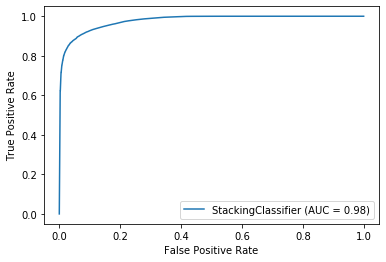

In [30]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.plot_roc_curve(model2, Xt, yt) 
plt.show()

In [31]:
from sklearn.metrics import recall_score

recall_score(yt, yhat2)

0.9809626753728051